In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn import metrics
from scipy.spatial.distance import pdist, cdist, squareform

In [3]:
df_path = "../Outputs/customer_order_train_reduced.csv"
df = pd.read_csv(df_path)
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,-5.910101,-1.817756,-3.132463,-0.107840,2.262797,-1.085222,-0.343117,1.695994,0.221188,-0.033039,...,-0.272325,0.211194,0.998564,0.661929,-0.246326,-0.339113,0.429339,0.863432,-0.747858,-0.352087
1,-6.179444,-2.108571,-3.644230,0.078246,4.048101,-1.165402,1.540327,-0.342280,-0.159625,-0.925080,...,0.326506,0.172667,-1.231313,-0.543753,0.244803,0.049766,-0.890263,1.930898,0.833700,1.178497
2,175.175162,-2.025396,-0.748486,1.191982,5.387377,3.564970,-5.178943,-5.159448,-2.580185,0.534896,...,1.137074,-0.716124,1.016299,3.055268,-0.415043,-0.712064,1.742104,0.337453,0.706408,6.483967
3,-5.815371,0.090122,-1.756488,-0.347117,-2.340362,-8.403755,4.236185,0.557626,-1.000335,-1.694324,...,-1.059698,1.697802,0.728849,-0.816363,0.541905,0.731675,0.402328,-0.866669,0.615065,-0.552924
4,-6.094946,-1.132857,-2.957879,0.130307,2.361835,-3.727978,1.167230,-3.244399,-0.304043,-0.437521,...,-0.171043,-0.366000,-0.145396,0.473588,0.183927,-0.220939,0.381579,-0.700740,0.339453,0.065392


DBSCAN model is affected by two key parameters: 
1. clustering radius 
2. minimum sample size

Below are several approaches we tried, 
to find out(narrow down) the appropriate parameters that fit into out model

In [4]:
X = df.values
# For the first tiral
# set radius as 3 and minimum sample size as 2
db = DBSCAN(eps=3, min_samples=2).fit(X)
 
labels = db.labels_ 
df['cluster_db'] = labels  # add the clustering result back to the dataframe
df.sort_values('cluster_db')

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,cluster_db
0,-5.910101,-1.817756,-3.132463,-0.107840,2.262797,-1.085222,-0.343117,1.695994,0.221188,-0.033039,...,0.211194,0.998564,0.661929,-0.246326,-0.339113,0.429339,0.863432,-0.747858,-0.352087,-1
13415,-4.806822,-1.446159,-1.935056,-0.490396,-0.156673,4.438962,-2.202389,-2.115206,-5.441359,1.365619,...,-0.781457,1.774493,-0.213561,-0.979514,0.732921,-1.196980,0.024342,0.078431,0.667055,-1
13414,212.989382,-3.405884,-1.692809,2.990067,8.951872,-8.676947,2.455723,7.668930,5.612855,2.470697,...,-1.917756,-4.889316,2.396766,0.316241,-1.014786,5.129032,-1.290806,-0.365117,2.176869,-1
13413,-5.126611,1.649594,-0.396849,-1.243026,-6.859559,1.254977,-5.574833,-2.597643,0.167228,-2.614968,...,2.262043,0.710900,-0.625739,3.306304,-0.824299,-2.177741,0.757316,0.510841,1.412737,-1
13412,-6.256468,4.613436,-0.221773,11.513154,5.271039,-0.205424,-0.983184,1.703804,0.399320,-0.257367,...,0.587844,0.569096,0.612419,-0.084372,-0.500902,0.366956,0.230599,-0.150323,0.659721,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13128,-6.211017,-2.647336,-3.927965,0.299520,5.079107,-0.818853,0.247882,0.910282,-0.454900,-0.062453,...,0.302564,1.010004,0.426967,-0.627227,-0.138537,0.049120,0.413423,-0.212321,0.855941,15
17974,-6.293424,-3.881471,-2.361712,0.325190,6.061423,-0.750071,-0.031002,0.665127,-1.035822,-0.257883,...,-0.237867,0.228055,-0.132464,0.097434,0.432506,0.155175,-0.069207,0.274245,0.052724,16
14997,-6.224541,-3.347103,-3.154720,0.250362,5.496618,-0.551986,0.153831,0.937717,-1.007968,-0.216954,...,-0.667452,0.401532,-0.296061,-0.069006,0.637682,0.253191,-0.067339,-0.139465,-0.392145,16
16794,-6.273801,-2.865810,-4.001854,0.362304,5.385191,-1.620964,0.416888,2.010377,0.022642,-0.130830,...,0.239630,0.210548,0.502688,-0.475916,0.507586,0.299351,-0.406129,0.053151,-0.114358,17


Since DBSCAN is differentiate clusters based on their density and depend on the parameters we set up, some objects may be considered as noise(outlier) which will not been included in any cluster.

Ideally, we want every single datapoint been grouped into cluster, but in most cases noise is always exist. So the first step for us is to reduce the nosie to certain level (in our case, we chose noise level = 0.009 as threshold), in other words, make sure the parameters we picked has a noise level no more than 0.009

In addition, in order to compare with K-mean result, we would like to see the grouping result when cluser number euqal to 5.

In [5]:
df.groupby('cluster_db').mean()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
cluster_db,,,,,,,,,,,,,,,,,,,,,
-1,0.067217,0.049193,0.006158,-0.003273,-0.063361,0.010248,-0.006080,-0.011418,0.002808,0.002833,...,0.000982,0.001888,-0.003702,0.001829,0.001197,-0.001128,-0.000786,0.000542,0.000156,0.002775
0,-6.895333,-29.013606,49.087990,0.075192,10.541499,0.414168,1.693615,0.775856,0.010336,-0.009800,...,-0.111120,0.115260,0.549128,-0.379190,0.367533,0.369147,0.320080,-0.380862,0.025982,0.017502
1,-6.256492,-2.989861,-3.875127,0.324630,5.633935,-1.106020,0.480189,1.138911,-0.210023,-0.345828,...,-0.077205,-0.195910,0.331077,-0.147238,-0.147858,0.064920,0.060119,-0.001149,-0.017002,-0.303921
2,-6.298746,-2.642974,-3.767719,0.298217,4.998708,-2.780339,0.559280,2.503800,1.182191,0.507989,...,0.011739,-0.516446,0.951742,-1.093328,-0.284629,0.946349,-0.452101,-0.507880,0.180149,-0.622664
3,-6.275318,-2.885413,-4.109611,0.308644,5.768160,-0.503303,-0.376914,0.183829,-1.052025,-0.182080,...,-0.029521,0.010474,0.166469,-0.381934,-0.350124,0.159750,-0.004079,-0.143524,-0.093563,-0.650821
4,-6.225647,-2.890878,-4.024569,0.295333,5.452970,-0.697997,-0.223623,0.838530,-1.223010,-0.169858,...,-0.205555,-0.297950,0.374490,-0.181045,-0.189673,0.317169,-0.103736,0.069058,0.030504,-0.215669
5,-6.211767,-2.830695,-4.046308,0.236430,5.359576,-0.151066,0.226879,0.497887,-1.280133,-0.028194,...,0.301486,0.161067,0.374133,0.501784,-0.794218,-0.741958,0.559697,-0.093948,0.176557,0.846894
6,-6.599431,-14.641259,19.477480,0.284402,8.367922,-0.540982,0.971633,0.562056,-0.180984,-0.087323,...,-0.335899,0.076976,0.458008,-0.212925,0.250406,-0.004220,-0.186271,-0.178820,0.140160,-0.095515
7,-6.869163,-26.808639,44.255382,0.133914,10.606468,0.355194,1.757410,0.172339,-0.565913,0.535145,...,-0.148232,0.023886,0.383691,-0.493321,0.376593,0.254687,0.039829,-0.507704,-0.013724,0.132308


In [6]:
# calculate the noise level (in DBSCAN model nosie are cluster as "-1")
raito = len(labels[labels[:] == -1]) / len(labels)
raito

0.989438714795716

We can see than the nosie level is about 0.99, which mean about 99% of the datapoints were not grouped into any cluster. 

We kept trying..and noticed that noise level decrease when we incread the radius.

In [8]:
raito_list_test=[]
for x in range(5, 65, 10):
    X_test = df.values
    db_x = DBSCAN(eps=x, min_samples=2).fit(X_test)
    labels = db_x.labels_ 
    
    # calculate the noise level
    raito_test = len(labels[labels[:] == -1]) / len(labels)
    raito_list_test.append(raito_test)
    
    # get the number of clusters
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    print(raito_test)
    print('number of clusters: %d' % n_clusters_)
    print("coefficient: %0.3f" % metrics.silhouette_score(X, labels))

0.8784708449028164
number of clusters: 75
coefficient: -0.474
0.26913923046410154
number of clusters: 33
coefficient: 0.018
0.10551368504561681
number of clusters: 24
coefficient: 0.382
0.04789765965886553
number of clusters: 15
coefficient: 0.384
0.02360174533915113
number of clusters: 6
coefficient: 0.559
0.012048790162633875
number of clusters: 11
coefficient: 0.633


In [9]:
for x in range(65, 115, 10):
    X_test = df.values
    db_x = DBSCAN(eps=x, min_samples=2).fit(X_test)
    labels = db_x.labels_ 
    
    # calculate the noise level
    raito_test = len(labels[labels[:] == -1]) / len(labels)
    raito_list_test.append(raito_test)
    
    # get the number of clusters
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    print(raito_test)
    print('number of clusters: %d' % n_clusters_)
    print("coefficient: %0.3f" % metrics.silhouette_score(X, labels))

0.006346687822292741
number of clusters: 6
coefficient: 0.699
0.0034212614042046807
number of clusters: 3
coefficient: 0.722
0.0020825069416898056
number of clusters: 2
coefficient: 0.836
0.0010412534708449028
number of clusters: 1
coefficient: 0.873
0.0008429194763982546
number of clusters: 1
coefficient: 0.879


it looks like when radius reaches 75, the cluster number would be less than 3, which does not meet criteria mentioned above. Also, the noise level is higher than our threshold when radius is below 55. 

In [11]:
# we increased the minimum sample size from 2 to 3
raito_list_test_2=[]
for x in range(5, 115, 10):
    X_test = df.values
    db_x = DBSCAN(eps=x, min_samples=3).fit(X_test)
    labels = db_x.labels_ 
    
    # calculate the noise level
    raito_test = len(labels[labels[:] == -1]) / len(labels)
    raito_list_test_2.append(raito_test)
    
    # get the number of clusters
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    print(raito_test)
    print('number of clusters: %d' % n_clusters_)
    print("coefficient: %0.3f" % metrics.silhouette_score(X, labels))

0.8835283617612059
number of clusters: 24
coefficient: -0.438
0.27151923839746134
number of clusters: 9
coefficient: 0.153
0.10739785799285997
number of clusters: 5
coefficient: 0.444
0.0485918286394288
number of clusters: 8
coefficient: 0.487
0.023998413328044428
number of clusters: 2
coefficient: 0.706
0.012842126140420468
number of clusters: 3
coefficient: 0.722
0.006644188813962713
number of clusters: 3
coefficient: 0.723
0.003520428401428005
number of clusters: 2
coefficient: 0.722
0.00218167393891313
number of clusters: 1
coefficient: 0.843
0.0010412534708449028
number of clusters: 1
coefficient: 0.873
0.0008429194763982546
number of clusters: 1
coefficient: 0.879


It seems no radius range meets our criteria(noise level<0.009 & cluster number = 5).

In [13]:
# head back to min_samples=2 and test test radius range from 55 to 75
raito_list_test_3=[]
for x in range(55, 75):
    X_test = df.values
    db_x = DBSCAN(eps=x, min_samples=2).fit(X_test)
    labels = db_x.labels_ 
    
    # calculate the noise level
    raito_test = len(labels[labels[:] == -1]) / len(labels)
    raito_list_test_3.append(raito_test)
    
    # get the number of clusters
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    print(raito_test)
    print('number of clusters: %d' % n_clusters_)
    print("coefficient: %0.3f" % metrics.silhouette_score(X, labels))

0.012048790162633875
number of clusters: 11
coefficient: 0.633
0.011305037683458944
number of clusters: 11
coefficient: 0.593
0.010858786195953986
number of clusters: 10
coefficient: 0.639
0.010263784212614042
number of clusters: 9
coefficient: 0.639
0.00971836572788576
number of clusters: 9
coefficient: 0.635
0.009222530741769139
number of clusters: 8
coefficient: 0.688
0.008478778262594208
number of clusters: 8
coefficient: 0.688
0.00803252677508925
number of clusters: 8
coefficient: 0.688
0.007387941293137644
number of clusters: 7
coefficient: 0.687
0.006991273304244348
number of clusters: 6
coefficient: 0.689
0.006346687822292741
number of clusters: 6
coefficient: 0.699
0.005999603332011107
number of clusters: 6
coefficient: 0.699
0.005454184847282825
number of clusters: 5
coefficient: 0.699
0.005255850852836176
number of clusters: 4
coefficient: 0.722
0.004908766362554542
number of clusters: 5
coefficient: 0.722
0.0046608488694962315
number of clusters: 5
coefficient: 0.722
0.0043

we found that when radius equals to 67, 70, 71, 72, the clustering results meets our criteria

In [17]:
# radius 67
db = DBSCAN(eps=67, min_samples=2).fit(X)
 
labels = db.labels_ 
df['cluster_db'] = labels  # add the clustering result back to the dataframe
df.sort_values('cluster_db')


# print our the number of observations per cluster
for c in np.unique(df.cluster_db):
        print('cluster {}: {}'.format(c, np.sum(df.cluster_db==c)))

cluster -1: 110
cluster 0: 20048
cluster 1: 3
cluster 2: 3
cluster 3: 2
cluster 4: 2


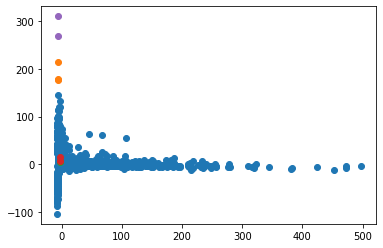

In [19]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
for i in range(n_clusters_):
    one_cluster = X[labels == i]
    plt.plot(one_cluster[:,0],one_cluster[:,1],'o')

plt.show()

In [15]:
# radius 70
db = DBSCAN(eps=70, min_samples=2).fit(X)
 
labels = db.labels_ 
df['cluster_db'] = labels  # add the clustering result back to the dataframe
df.sort_values('cluster_db')

# print our the number of observations per cluster
for c in np.unique(df.cluster_db):
        print('cluster {}: {}'.format(c, np.sum(df.cluster_db==c)))

cluster -1: 94
cluster 0: 20064
cluster 1: 2
cluster 2: 3
cluster 3: 3
cluster 4: 2


In [16]:
# radius 72
db = DBSCAN(eps=72, min_samples=2).fit(X)
 
labels = db.labels_ 
df['cluster_db'] = labels  # add the clustering result back to the dataframe
df.sort_values('cluster_db')

# print our the number of observations per cluster
for c in np.unique(df.cluster_db):
        print('cluster {}: {}'.format(c, np.sum(df.cluster_db==c)))

cluster -1: 82
cluster 0: 20076
cluster 1: 2
cluster 2: 3
cluster 3: 3
cluster 4: 2


Over the 'qualified' ones we chose, we could see that the majority of the datapoints are in one cluster.

Thus, we think DBSCAN may not be the appropriate method to cluster our dataset.